### What is Linear Rregression?

Linear Regression is a process of estimating a line that best fits the general trend of some data. The goal of linear regression is given a data, we want to find the best curve that give a very good estimate of that data. Therefore, it is very important to visualize the data to see what are the trends before attempting to fit the data. Fitting a data with a line when there is no linear relationship will result in a bad model.

<img src='Linear_reg_img1.png'></img>

The data in plot A seem to have linear correlation between the x and y variable, so it makes sense to fit it with a line. However, plot B does not seem to have any correlation between the two variables, so it would be a bad idea to fit it with a line. 

### How to find the line of best-fit?
We will use the LinearRegression model in Sklearn to find the line of best fit. We will import our data and pass it to our algorithm to find the best parameters for our model. 

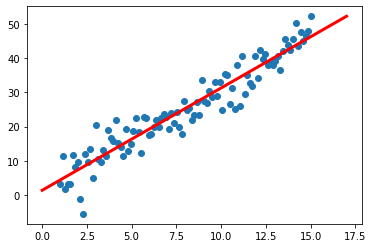

In [51]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

data = pd.read_csv('Linear_regression_data1.csv')

x = np.array(data.x).reshape(-1, 1)
y = np.array(data.y).reshape(-1, 1)

plt.scatter(x , y)

lreg = LinearRegression()
lreg.fit(x, y)

newx = np.linspace(0, 17, 100).reshape(-1, 1)
newy = lreg.predict(newx)

_=plt.plot(newx, newy, c='r', linewidth=3)

As you can see, this line seem to perfectly fit this data. For every value of the dependent variable x, we can now use the model to estimate the corresponding value of the independent variable y, which is the typical use case for linear models.

# Non-Linear Regression
As you can imagine, not all variables have a linear relationship. The data on the plot below shows one such example. 

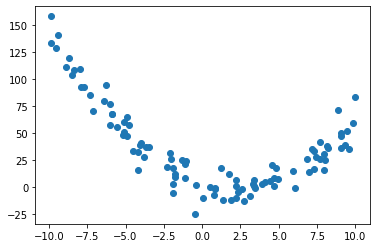

In [119]:
import pandas as pd
from matplotlib import pylab as plt

data = pd.read_csv('Linear_regression_data3.csv')
_ = plt.scatter(data.x, data.y)


Attempting to fit this data with a line will simply underfit the data. This means that our model will perform poorly on the training data, and would not likely generalize to instances it has never seen before. As you can see, our model will only predict few instance correctly.

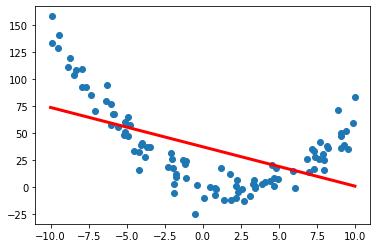

In [66]:
import numpy as np
from matplotlib import pylab as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Linear_regression_data3.csv')

reg = LinearRegression()
x = np.array(data.x).reshape(-1, 1)
y = np.array(data.y).reshape(-1, 1)
plt.scatter(x, y)
reg.fit(x, y)



xnew = np.linspace(-10, 10, 100).reshape(-1, 1)
ynew = reg.predict(xnew)
_ = plt.plot(xnew, ynew, linewidth=3, c='r')


<style>
    figure{
    text-align: center;
}
</style>
<figure>

<figcaption align = "center"> Figure 2.1: Example of model underfitting</figcaption>
</figure>



We need to fit the data with something better than just a simple line. If you closely inspect the data, we can see that it has a shape that closely resembles a parabola. So we can use sklearn polynomialFeatures to actually fit the data with a polynomial of degree 2. The following code fit the data with a polynomial instead.

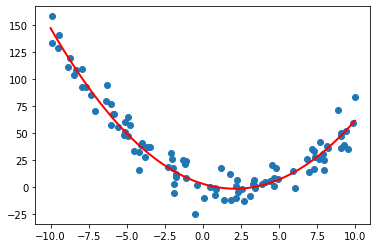

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
reg.fit(x, y)
plt.scatter(x, y)


xnew = np.linspace(-10, 10, 100).reshape(-1, 1)
ynew = reg.predict(xnew)
_=plt.plot(xnew, ynew, c='r', linewidth=2)

The resulting curve seem to fit the data very well and it will generalize much better than the linear model we tried earlier. In fact, this data was generated using the quadratic equation $y = x^2 - 4x + 3$ with gaussian noise.

# Underfitting and Overfitting of Data 

One example of underfitting is figure 2.1. In this instance we can see that the line is a poor estimate for the data. It deviated badly for large portions of the dataset. It is safe to assume that it will also  not generalize very well on the test data. Indeed, this is the characteristic of a model that overfits. It will perform poorly on both the training and test set. 

On the other hand, if we were to use a polynomial of a very high degree to fit this data, it will be highly accurate on the training data, but it will not generalize too well on the training set. So when a model performs very well on the training set and poorly on the test set, we say that the model is overfiting the data. 